In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

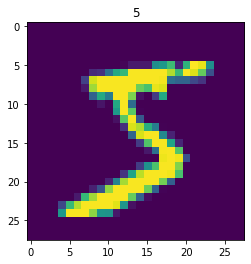

In [6]:
plt.imshow(X_train[0])
plt.title(y_train[0])
plt.show()

In [7]:
X_train = X_train.reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten

In [9]:
model = Sequential()
model.add(Conv2D(filters=4, kernel_size = (5,5), input_shape = (28,28,1), activation = 'relu'))
model.add(AveragePooling2D((2,2)))

model.add(Conv2D(filters=4, kernel_size = (5,5), activation = 'relu'))
model.add(AveragePooling2D((2,2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 4)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 4)           404       
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 10)                6

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [11]:
model.fit(X_train, y_train, epochs=1, batch_size=1)

60000/60000 [==============================] - 459s 7ms/step - loss: 0.3410 - acc: 0.9025
